# DATA VISION

### Importing Libraries

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import lightgbm as lgb

import gc
import warnings

#### Loading Dataset

In [209]:
df=pd.read_csv('students.csv')
target_col = 'Student Status'

#### Basic EDA

In [210]:
df.isnull().sum()

Marital Status                   0
Application Mode                 0
Application Order                0
Course Name                      0
Daytime/Evening Attendance       0
Previous Qualification           0
Nationality                      0
Mother's Qualification           0
Father's Qualification           0
Mother's Occupation              0
Father's Occupation              0
Displaced Student                0
Special Educational Needs        0
Is Debtor                        0
Tuition Fees Up-to-Date          0
Gender (1=Male, 0=Female)        0
Scholarship Holder               0
Age at Enrollment                0
International Student            0
Credited Units (1st Sem)         0
Enrolled Units (1st Sem)         0
Evaluated Units (1st Sem)        0
Approved Units (1st Sem)         0
Average Grade (1st Sem)          0
Not Evaluated Units (1st Sem)    0
Credited Units (2nd Sem)         0
Enrolled Units (2nd Sem)         0
Evaluated Units (2nd Sem)        0
Approved Units (2nd 

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital Status                 4424 non-null   object 
 1   Application Mode               4424 non-null   object 
 2   Application Order              4424 non-null   int64  
 3   Course Name                    4424 non-null   object 
 4   Daytime/Evening Attendance     4424 non-null   object 
 5   Previous Qualification         4424 non-null   object 
 6   Nationality                    4424 non-null   object 
 7   Mother's Qualification         4424 non-null   object 
 8   Father's Qualification         4424 non-null   object 
 9   Mother's Occupation            4424 non-null   object 
 10  Father's Occupation            4424 non-null   object 
 11  Displaced Student              4424 non-null   object 
 12  Special Educational Needs      4424 non-null   o

In [212]:
df.describe()

,Application Order,Age at Enrollment,Credited Units (1st Sem),Enrolled Units (1st Sem),Evaluated Units (1st Sem),Approved Units (1st Sem),Average Grade (1st Sem),Not Evaluated Units (1st Sem),Credited Units (2nd Sem),Enrolled Units (2nd Sem),Evaluated Units (2nd Sem),Approved Units (2nd Sem),Average Grade (2nd Sem),Not Evaluated Units (2nd Sem),Unemployment Rate (%),Inflation Rate (%),GDP per Capita (USD)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


#### OHE

In [213]:
_yes_no = {'yes','no'}

yesno_cols = [
    col for col in df.columns
    if df[col].dropna().astype(str).str.strip().str.lower().isin(_yes_no).all()
]

df[yesno_cols] = df[yesno_cols].apply(
    lambda s: s.astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0}).astype('Int64')
)

print("Converted columns:", yesno_cols)
df[yesno_cols].head()

Converted columns: ['Displaced Student', 'Special Educational Needs', 'Is Debtor', 'Tuition Fees Up-to-Date', 'Scholarship Holder', 'International Student']
 ['Displaced Student', 'Special Educational Needs', 'Is Debtor', 'Tuition Fees Up-to-Date', 'Scholarship Holder', 'International Student']


,Displaced Student,Special Educational Needs,Is Debtor,Tuition Fees Up-to-Date,Scholarship Holder,International Student
0,1,0,0,1,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,1,0,0
4,0,0,0,1,0,0


#### Label Encoder

In [214]:
df['Gender (1=Male, 0=Female)'] = df['Gender (1=Male, 0=Female)'].map({'Male': 1, 'Female': 0})

In [215]:
df['Student Status'] = df['Student Status'].map({
    'Dropout':1,
    'Enrolled':0,
    'Graduate':0
})

### Advance EDA

In [216]:
df_clean = df.copy()
target_col = 'Student Status'

In [217]:
print("\nTarget distribution (counts):")
print(df_clean[target_col].value_counts())

print("\nTarget distribution (percent):")
print(df_clean[target_col].value_counts(normalize=True).mul(100).round(2))



Target distribution (counts):
Student Status
0    3003
1    1421
Name: count, dtype: int64

Target distribution (percent):
Student Status
0    67.88
1    32.12
Name: proportion, dtype: float64


In [218]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64', 'Int64']).columns.drop(target_col)
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns


#### Univariate EDA

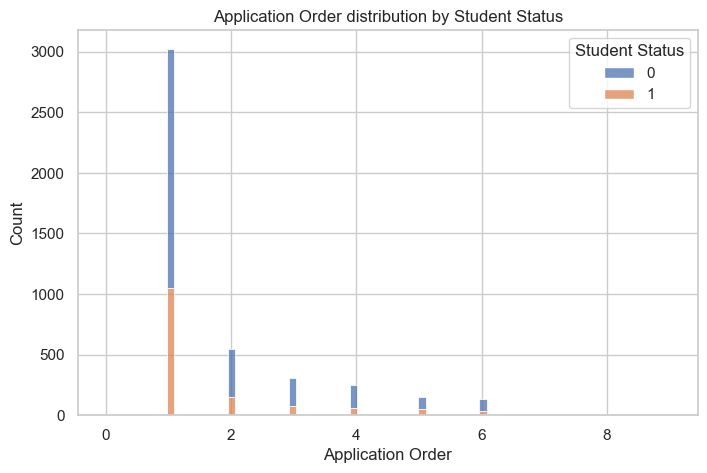

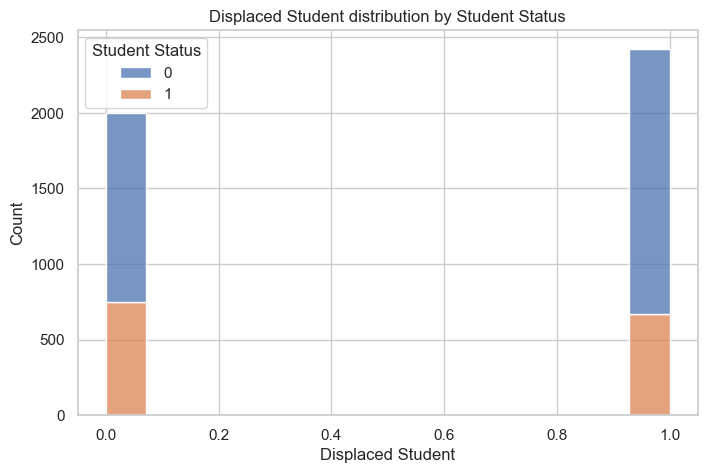

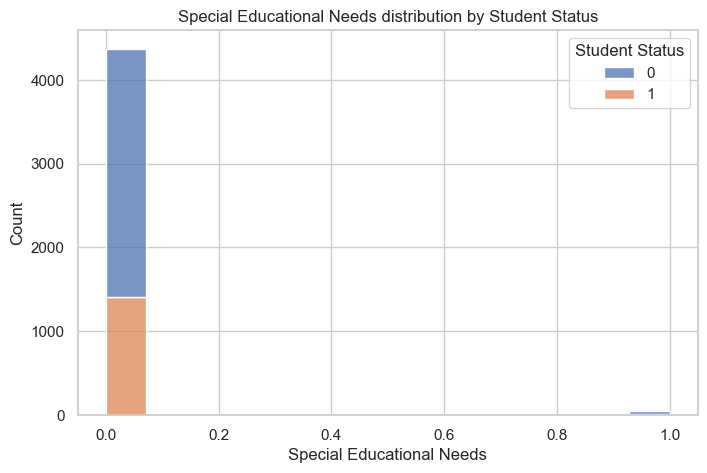

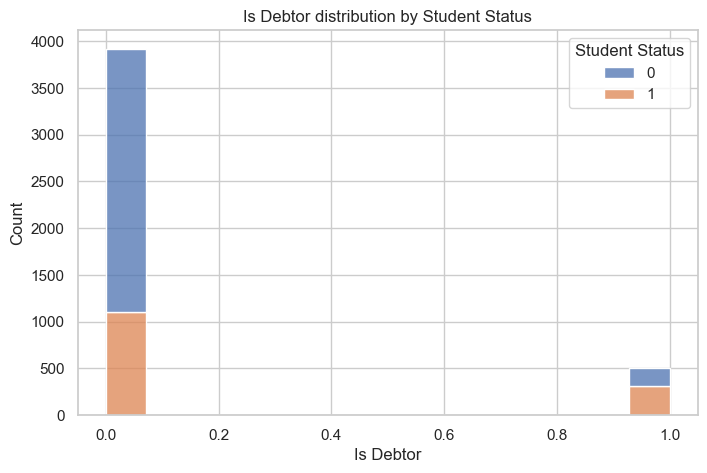

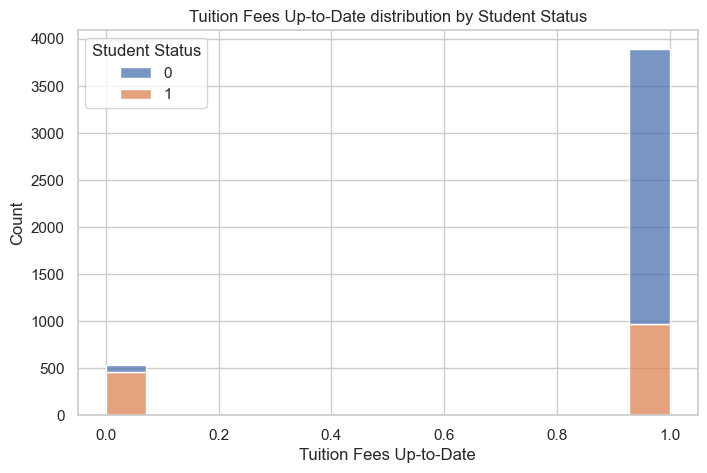

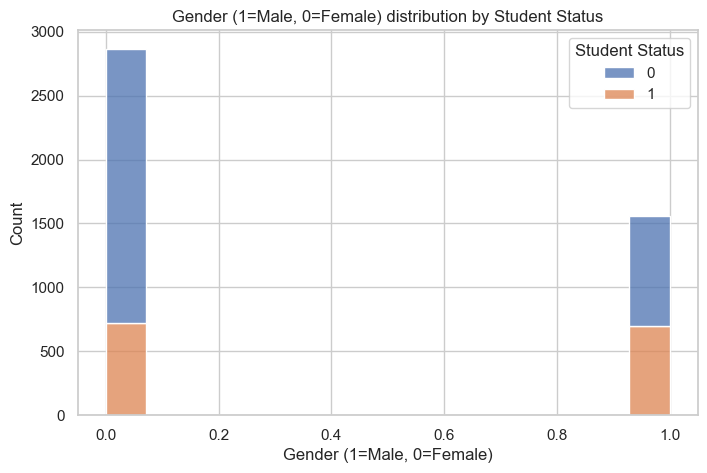

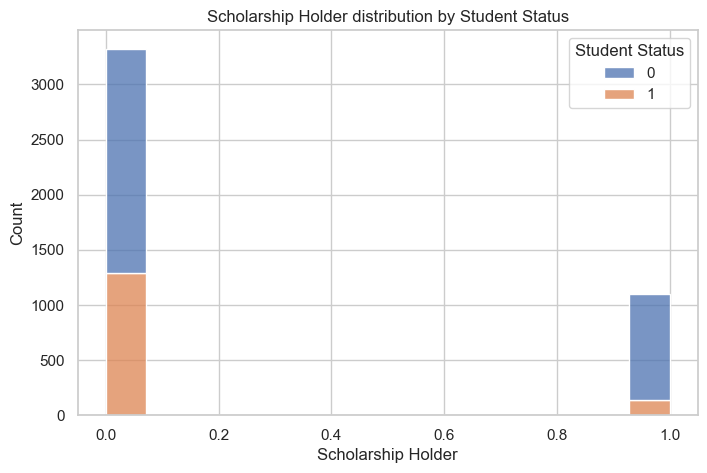

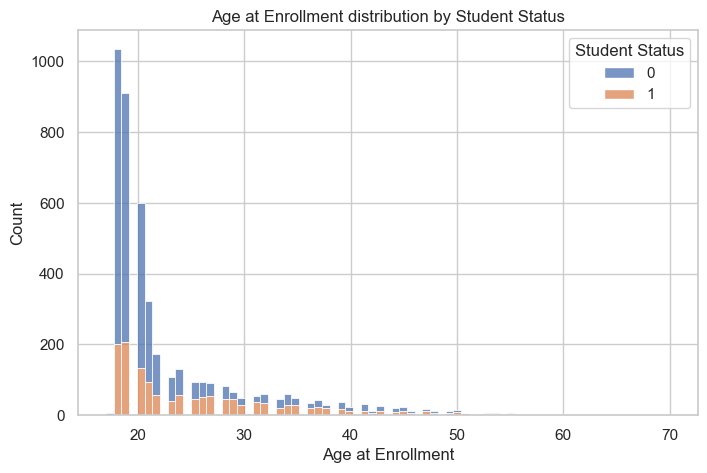

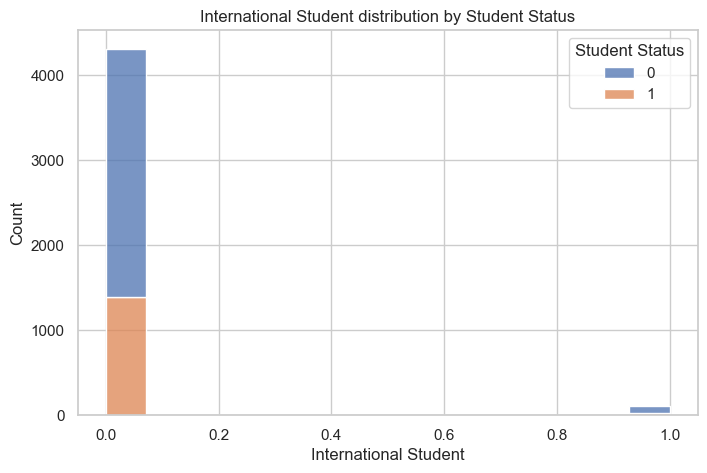

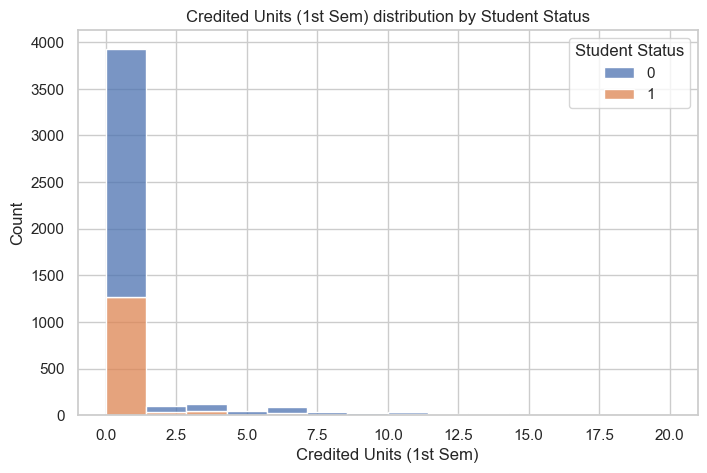

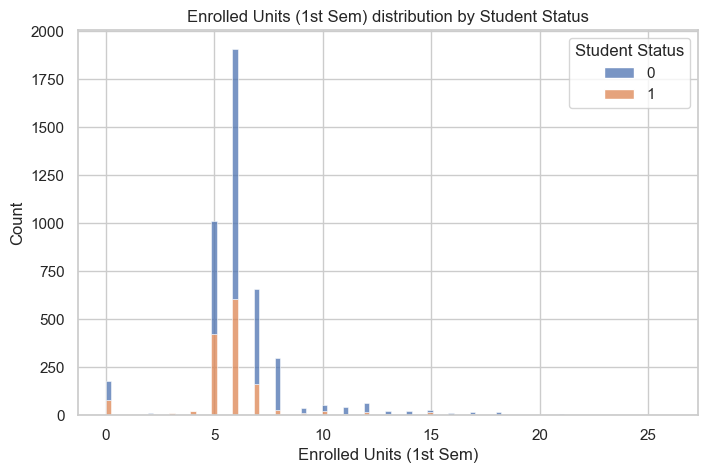

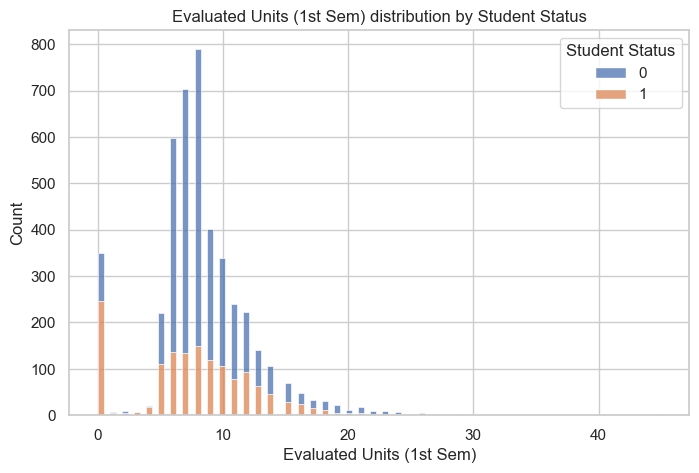

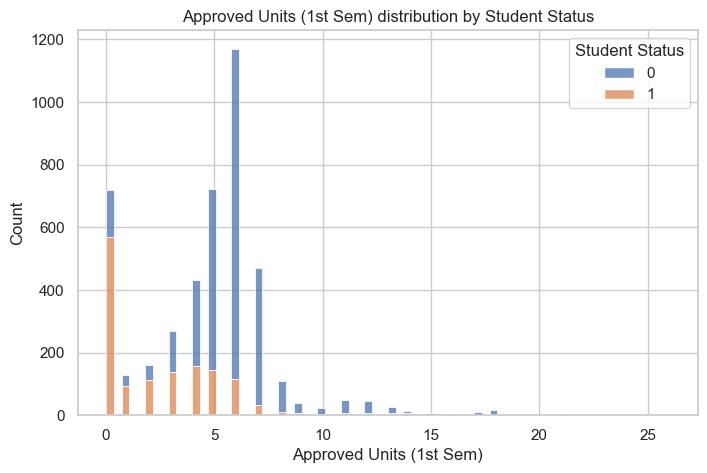

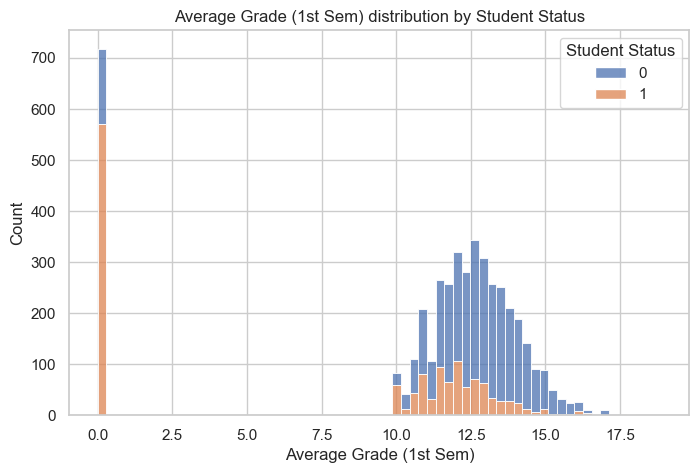

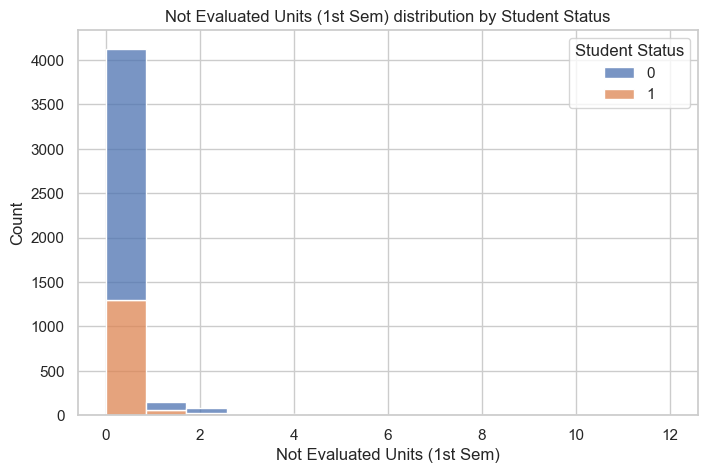

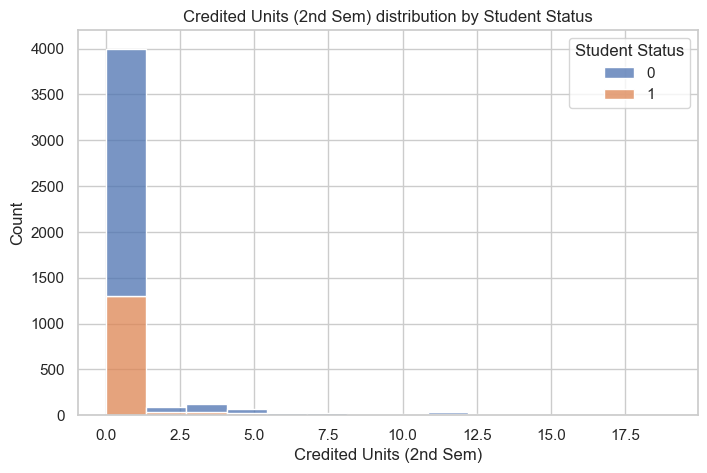

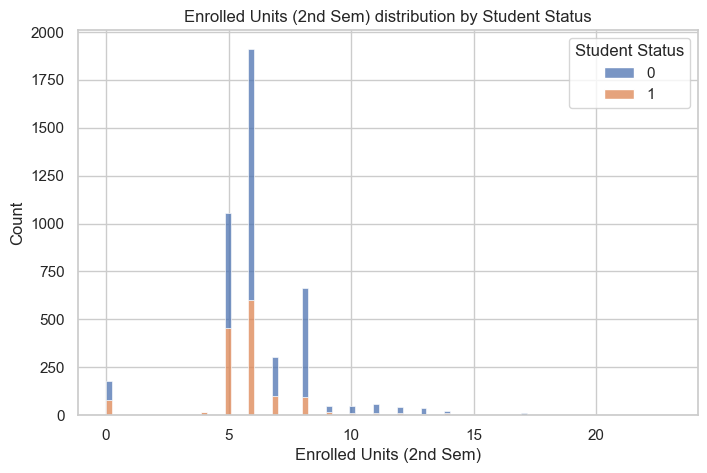

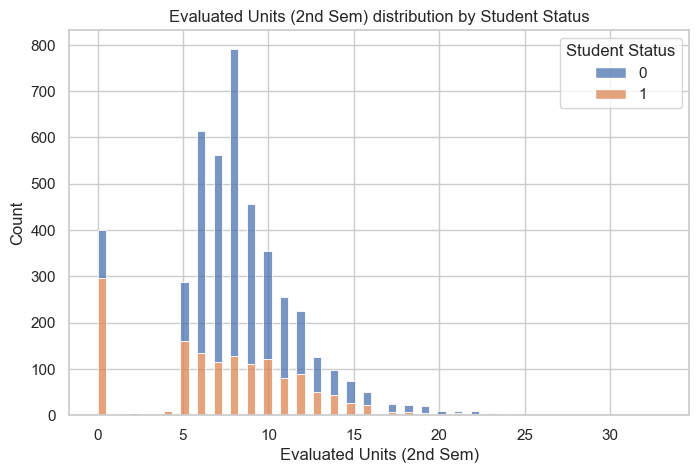

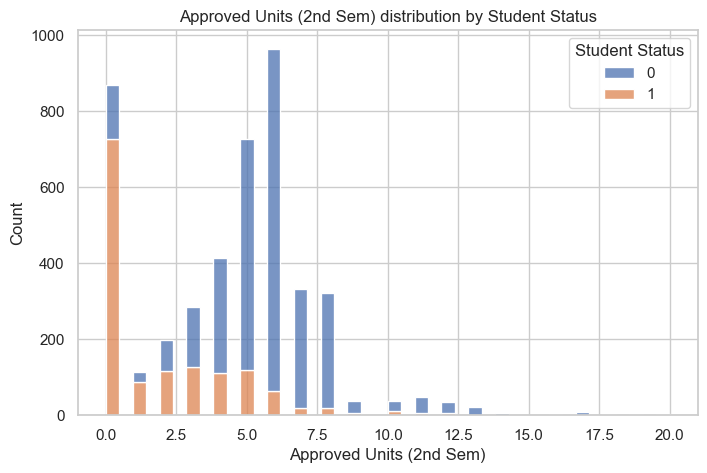

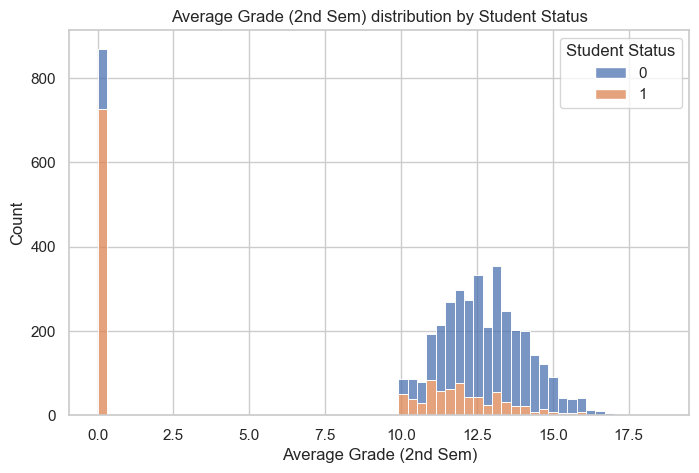

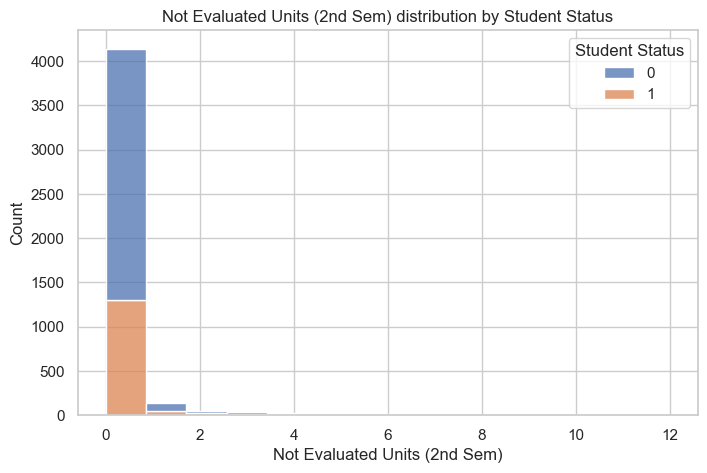

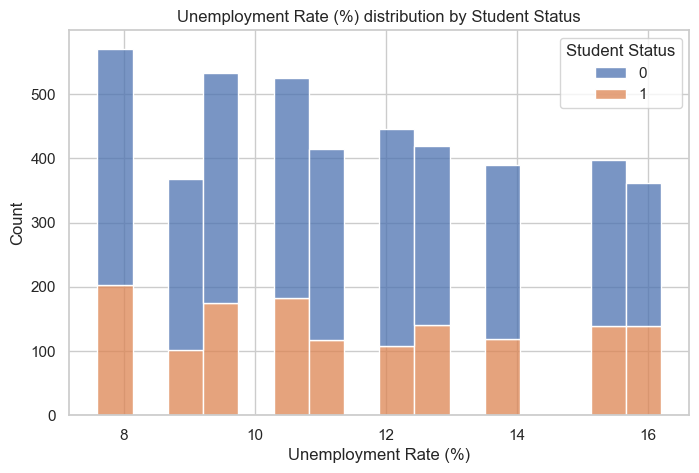

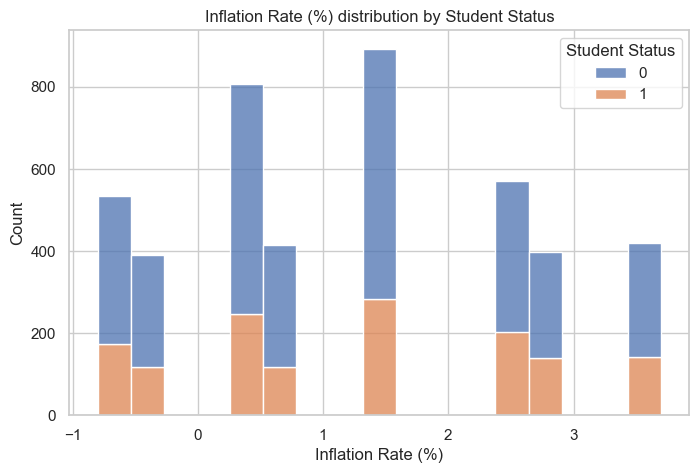

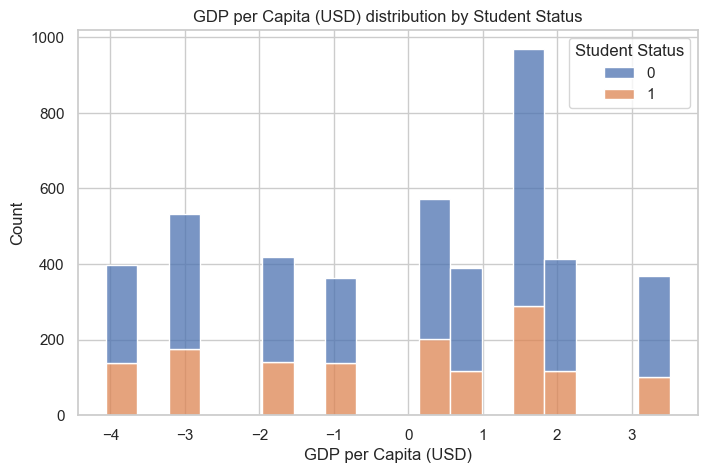

In [219]:
def plot_num_vs_target(col):
    
    sns.histplot(data=df_clean, x=col, hue=target_col, multiple='stack')
    plt.title(f"{col} distribution by {target_col}")
    plt.show()

for col in num_cols:
    plot_num_vs_target(col)


===== Marital Status vs Student Status (row %) =====


Student Status,0,1
Marital Status,,
Divorced,0.538,0.462
Facto Union,0.560,0.440
Legally Separated,0.333,0.667
Married,0.528,0.472
Single,0.698,0.302
Widower,0.750,0.250


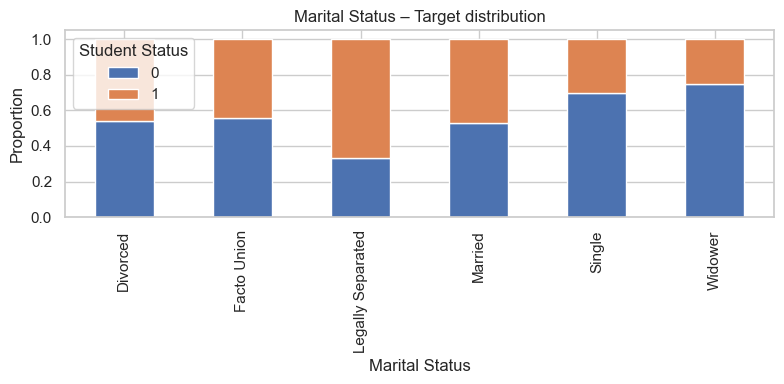


===== Application Mode vs Student Status (row %) =====


Student Status,0,1
Application Mode,,
1st phase—general contingent,0.798,0.202
1st phase—special contingent (Azores Island),0.875,0.125
1st phase—special contingent (Madeira Island),0.868,0.132
2nd phase—general contingent,0.706,0.294
3rd phase—general contingent,0.637,0.363
Change in course,0.631,0.369
Change in institution/course,0.661,0.339
Change in institution/course (International),1.000,0.000
Holders of other higher courses,0.388,0.612


C:\Users\mahes\AppData\Local\Temp\ipykernel_25884\3236060599.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


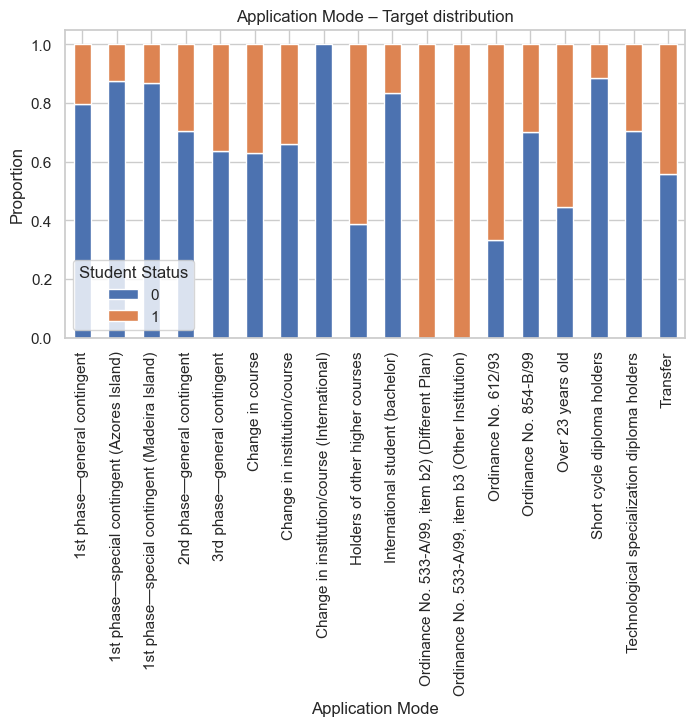


===== Course Name vs Student Status (row %) =====


Student Status,0,1
Course Name,,
Advertising and Marketing Management,0.646,0.354
Agronomy,0.590,0.410
Animation and Multimedia Design,0.619,0.381
Basic Education,0.557,0.443
Biofuel Production Technologies,0.333,0.667
Communication Design,0.774,0.226
Equiniculture,0.447,0.553
Informatics Engineering,0.459,0.541
Journalism and Communication,0.695,0.305


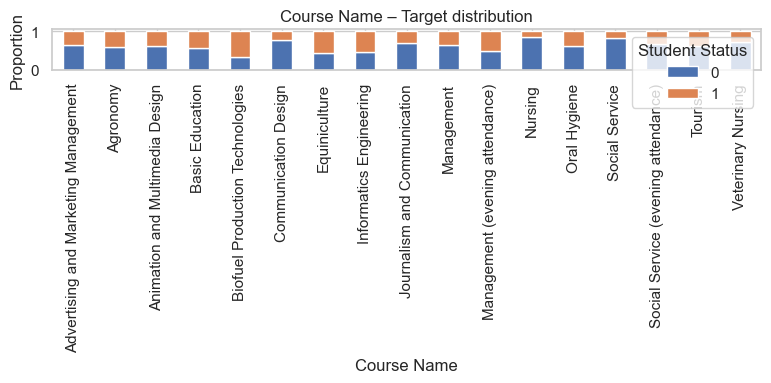


===== Daytime/Evening Attendance vs Student Status (row %) =====


Student Status,0,1
Daytime/Evening Attendance,,
Daytime,0.692,0.308
Evening,0.571,0.429


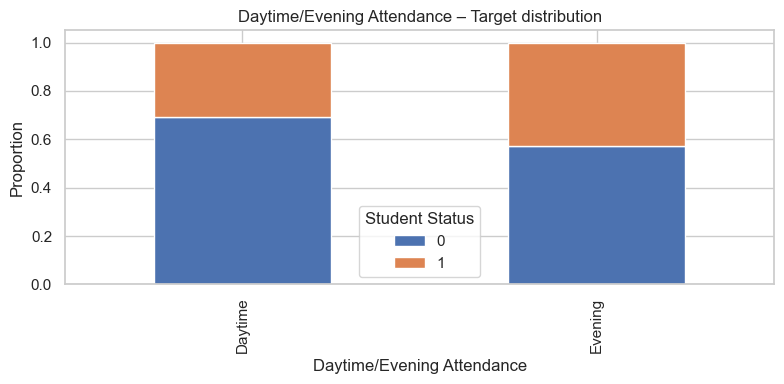


===== Previous Qualification vs Student Status (row %) =====


Student Status,0,1
Previous Qualification,,
10th year,0.000,1.000
10th year—not completed,0.500,0.500
11th year—not completed,0.250,0.750
12th year—not completed,0.000,1.000
Basic education 2nd cycle,0.571,0.429
Basic education 3rd cycle,0.358,0.642
Frequency of higher education,0.562,0.438
Higher education—bachelor’s degree,0.304,0.696
Higher education—degree,0.405,0.595


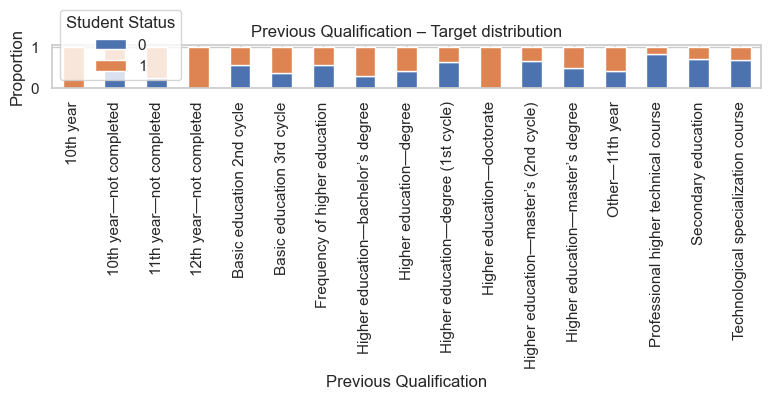


===== Nationality vs Student Status (row %) =====


Student Status,0,1
Nationality,,
Angolan,0.500,0.500
Brazilian,0.632,0.368
Cape Verdean,0.692,0.308
Colombian,0.000,1.000
Cuban,1.000,0.000
Dutch,1.000,0.000
English,1.000,0.000
German,1.000,0.000
Guinean,0.800,0.200


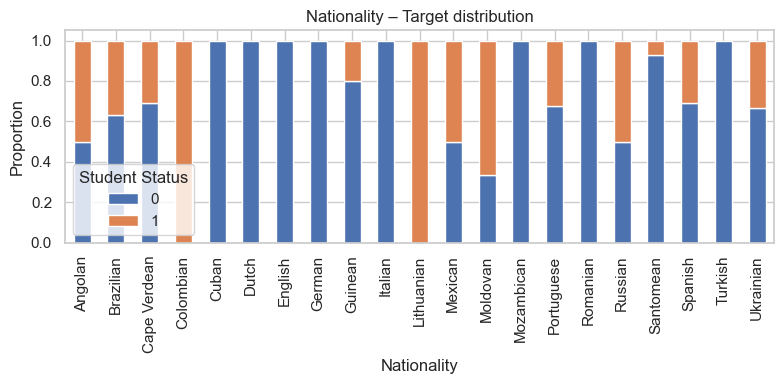


===== Mother's Qualification vs Student Status (row %) =====


Student Status,0,1
Mother's Qualification,,
10th Year,0.000,1.000
11th Year—not completed,0.333,0.667
12th Year—not completed,0.375,0.625
2nd cycle general high school,0.262,0.738
2nd year complementary,0.500,0.500
7th Year (Old),0.333,0.667
7th year,0.667,0.333
8th year,0.333,0.667
9th—not completed,0.333,0.667


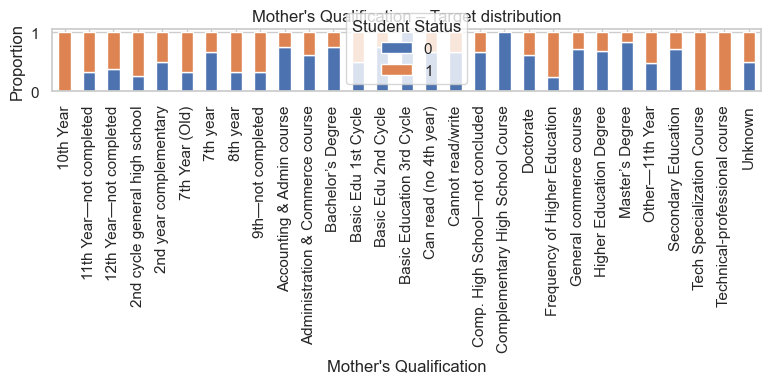


===== Father's Qualification vs Student Status (row %) =====


Student Status,0,1
Father's Qualification,,
10th Year,0.750,0.250
11th Year—not completed,0.000,1.000
12th Year—not completed,0.800,0.200
2nd cycle general high school,0.000,1.000
2nd year complementary,0.000,1.000
7th Year (Old),0.600,0.400
7th year,0.500,0.500
8th year,0.750,0.250
9th—not completed,0.000,1.000


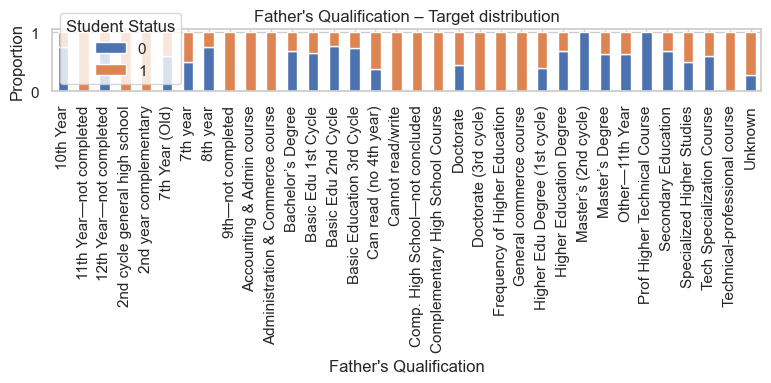


===== Mother's Occupation vs Student Status (row %) =====


Student Status,0,1
Mother's Occupation,,
Admin/Commercial Directors,1.000,0.000
Administrative Staff,0.696,0.304
Armed Forces,0.750,0.250
Armed Forces Officers,1.000,0.000
Armed Forces Sergeants,0.714,0.286
Blank,0.235,0.765
Care Workers,0.909,0.091
Farmers/Ag Workers,0.714,0.286
Finance/Admin Specialists,1.000,0.000


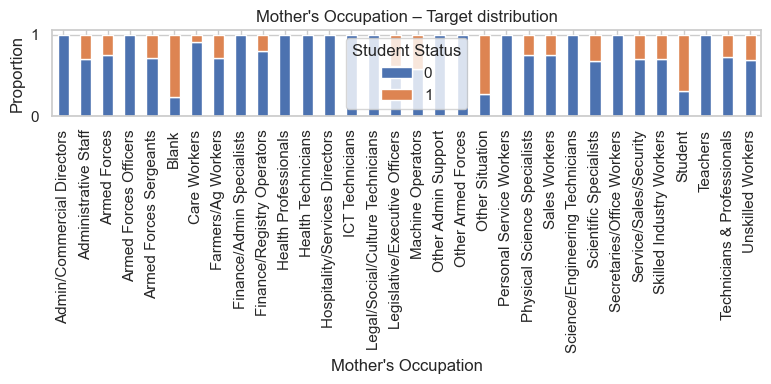


===== Father's Occupation vs Student Status (row %) =====


Student Status,0,1
Father's Occupation,,
Admin/Commercial Directors,0.500,0.500
Administrative Staff,0.640,0.360
Armed Forces,0.680,0.320
Armed Forces Officers,1.000,0.000
Armed Forces Sergeants,1.000,0.000
Assembly Workers,1.000,0.000
Blank,0.316,0.684
Care Workers,1.000,0.000
Construction Workers,1.000,0.000


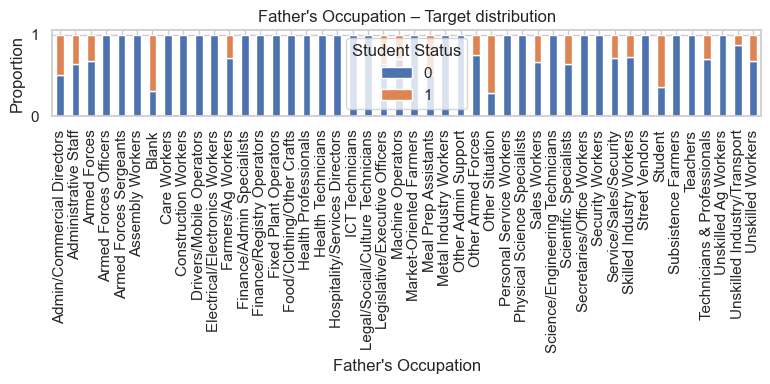

In [220]:
def cat_target_table(col):
    tab = pd.crosstab(df_clean[col], df_clean[target_col],
                      normalize='index').round(3)
    print(f"\n===== {col} vs {target_col} (row %) =====")
    display(tab)

    tab.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f"{col} – Target distribution")
    plt.ylabel("Proportion")
    plt.legend(title=target_col)
    plt.tight_layout()
    plt.show()

for col in cat_cols:
    cat_target_table(col)

In [221]:
# temporary one-hot for MI (won't be the final encoding yet)
df_mi = pd.get_dummies(df_clean[num_cols.tolist() + cat_cols.tolist() + [target_col]],
                       columns=cat_cols,
                       drop_first=True)

X_mi = df_mi.drop(columns=[target_col])
y_mi = df_mi[target_col]

mi_scores = mutual_info_classif(X_mi, y_mi, discrete_features='auto', random_state=42)

mi_df = pd.Series(mi_scores, index=X_mi.columns).sort_values(ascending=False)
print("\nMutual Information with Student Status:")
display(mi_df.head(25))



Mutual Information with Student Status:


Approved Units (2nd Sem)                                   0.220623
Average Grade (2nd Sem)                                    0.194105
Approved Units (1st Sem)                                   0.171377
Average Grade (1st Sem)                                    0.130918
Tuition Fees Up-to-Date                                    0.087818
Evaluated Units (2nd Sem)                                  0.063639
Evaluated Units (1st Sem)                                  0.057703
Age at Enrollment                                          0.045433
Enrolled Units (1st Sem)                                   0.037834
Scholarship Holder                                         0.033534
Is Debtor                                                  0.027576
Gender (1=Male, 0=Female)                                  0.024163
Application Mode_Over 23 years old                         0.022770
Previous Qualification_11th year—not completed             0.018855
Father's Occupation_Legislative/Executive Office

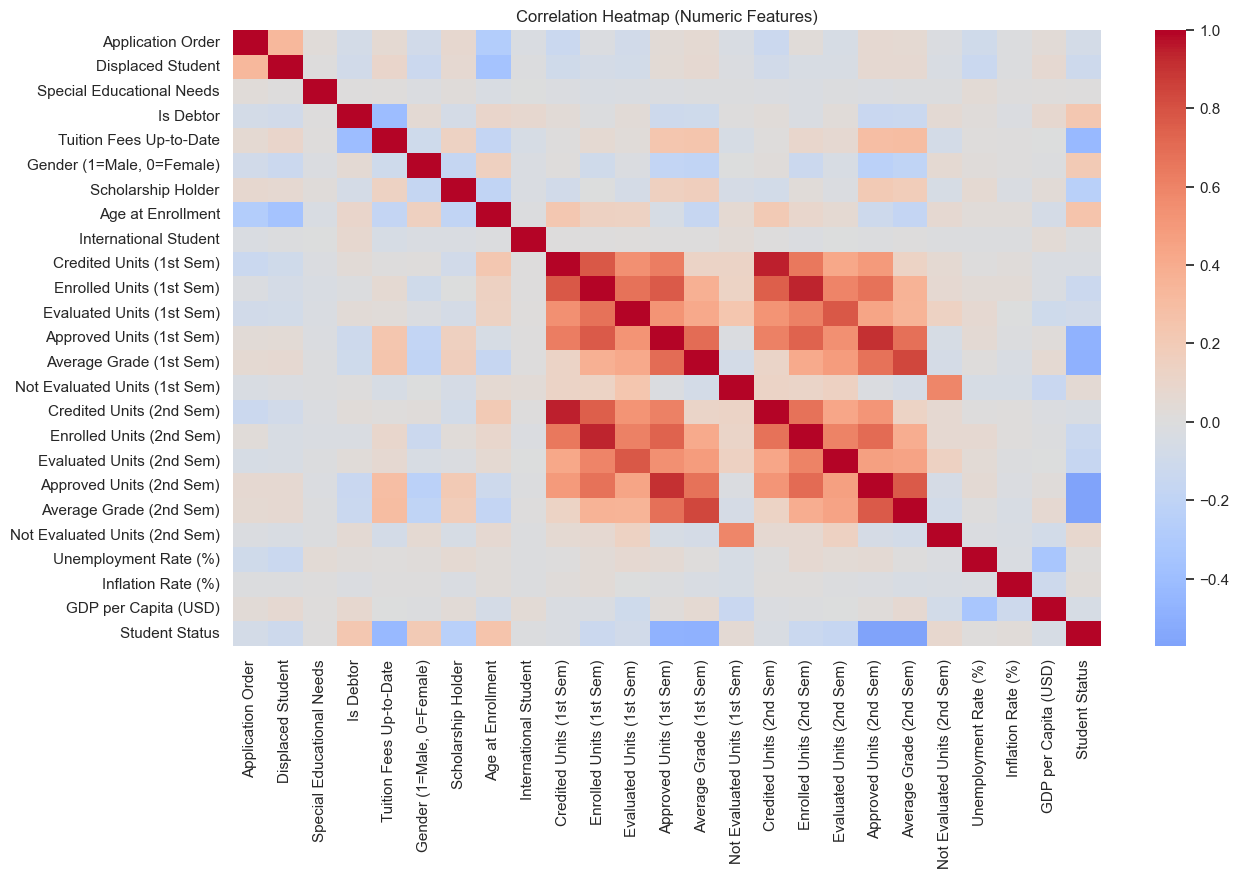

In [222]:
plt.figure(figsize=(14, 8))
corr = df_clean[num_cols.tolist() + [target_col]].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [223]:
def merge_rare_categories(df, col, min_freq=0.02):
    freq = df[col].value_counts(normalize=True)
    rare_cats = freq[freq < min_freq].index
    df[col] = df[col].replace(rare_cats, "Other")
    return df

for col in cat_cols:
    df_clean = merge_rare_categories(df_clean, col, min_freq=0.02)  # at least 2% of data

In [224]:
# adjust names if slightly different in your CSV
enrolled_1 = 'Enrolled Units (1st Sem)'
enrolled_2 = 'Enrolled Units (2nd Sem)'
approved_1 = 'Approved Units (1st Sem)'
approved_2 = 'Approved Units (2nd Sem)'

# Total units
df_clean['Total Enrolled Units'] = df_clean[enrolled_1] + df_clean[enrolled_2]
df_clean['Total Approved Units'] = df_clean[approved_1] + df_clean[approved_2]

# Success ratios
df_clean['Success Ratio 1st Sem'] = df_clean[approved_1] / df_clean[enrolled_1].replace(0, np.nan)
df_clean['Success Ratio 2nd Sem'] = df_clean[approved_2] / df_clean[enrolled_2].replace(0, np.nan)
df_clean['Overall Success Ratio'] = df_clean['Total Approved Units'] / df_clean['Total Enrolled Units'].replace(0, np.nan)

# Improvement / Deterioration between semesters
df_clean['Success Ratio Change'] = df_clean['Success Ratio 2nd Sem'] - df_clean['Success Ratio 1st Sem']

# Replace inf/nan created by division
df_clean[['Success Ratio 1st Sem',
          'Success Ratio 2nd Sem',
          'Overall Success Ratio',
          'Success Ratio Change']] = \
df_clean[['Success Ratio 1st Sem',
          'Success Ratio 2nd Sem',
          'Overall Success Ratio',
          'Success Ratio Change']].fillna(0)


In [225]:
# binary financial risk features (adjust names if needed)
risk_cols = []
if 'Is Debtor' in df_clean.columns:
    risk_cols.append('Is Debtor')
if 'Tuition Fees Up-to-Date' in df_clean.columns:
    # if 1 = up-to-date, risk is (1 - value)
    df_clean['Not UpToDate Fees'] = 1 - df_clean['Tuition Fees Up-to-Date']
    risk_cols.append('Not UpToDate Fees')
if 'Scholarship Holder' in df_clean.columns:
    # lower risk if scholarship holder, so risk is inverted
    df_clean['No Scholarship'] = 1 - df_clean['Scholarship Holder']
    risk_cols.append('No Scholarship')

df_clean['Financial Risk Score'] = df_clean[risk_cols].sum(axis=1)


In [226]:
support_cols = []
if 'Special Educational Needs' in df_clean.columns:
    support_cols.append('Special Educational Needs')
if 'Displaced Student' in df_clean.columns:
    support_cols.append('Displaced Student')
if 'International Student' in df_clean.columns:
    support_cols.append('International Student')

if support_cols:
    df_clean['Support Needs Count'] = df_clean[support_cols].sum(axis=1)


In [227]:
if 'Daytime/Evening Attendance' in df_clean.columns:
    # assuming 1 = Daytime, 0 = Evening
    df_clean['Is Daytime'] = df_clean['Daytime/Evening Attendance']


In [228]:
# these might be categorical (e.g., 'basic', 'higher', 'PhD')
parent_qual_cols = []
if "Mother's Qualification" in df_clean.columns:
    parent_qual_cols.append("Mother's Qualification")
if "Father's Qualification" in df_clean.columns:
    parent_qual_cols.append("Father's Qualification")

# map them to numeric ranking if possible
edu_map = {
    'None': 0, 'no formal education': 0,
    'Basic': 1, 'primary': 1,
    'Secondary': 2, 'high school': 2,
    'Higher': 3, 'undergraduate': 3,
    'Masters': 4, 'postgraduate': 4,
    'Doctorate': 5, 'PhD': 5
}

for col in parent_qual_cols:
    df_clean[col + ' (num)'] = (
        df_clean[col].astype(str).str.title().map(edu_map).fillna(2)  # default mid level
    )

num_parent_qual_cols = [c for c in df_clean.columns if c.endswith('(num)')]
if num_parent_qual_cols:
    df_clean['Parental Education Index'] = df_clean[num_parent_qual_cols].mean(axis=1)


In [229]:
if 'Financial Risk Score' in df_clean.columns and 'Overall Success Ratio' in df_clean.columns:
    df_clean['Risk x Low Performance'] = df_clean['Financial Risk Score'] * (1 - df_clean['Overall Success Ratio'])

if 'Age at Enrollment' in df_clean.columns and 'Financial Risk Score' in df_clean.columns:
    df_clean['Mature x Financial Risk'] = df_clean['Age at Enrollment'] * df_clean['Financial Risk Score']


In [230]:
# update numeric columns after engineering
num_cols_final = df_clean.select_dtypes(include=['int64', 'float64', 'Int64']).columns.drop(target_col)

# OPTIONAL small set of still-needed categoricals (that you didn't target-encode)
remaining_cat = []  # e.g., if you want to keep a few low-cardinality ones

# one-hot only the remaining low-cardinal categoricals
df_model = pd.get_dummies(df_clean[num_cols_final.tolist() + remaining_cat + [target_col]], # pyright: ignore[reportAttributeAccessIssue]
                          columns=remaining_cat,
                          drop_first=True)

X = df_model.drop(columns=[target_col])
y = df_model[target_col]

print("Final feature matrix shape:", X.shape)
print("Number of features:", X.shape[1])


Final feature matrix shape: (4424, 39)
Number of features: 39


In [231]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (3539, 39)
Test shape: (885, 39)


In [232]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print("Class Weights:", class_weight_dict)


Class Weights: {0: 0.7366777685262281, 1: 1.5562884784520667}


In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(
    max_iter=3000,
    class_weight=class_weight_dict,
    n_jobs=-1
)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("LOGISTIC ACCURACY:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


LOGISTIC ACCURACY: 0.8734463276836159
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       601
           1       0.78      0.83      0.81       284

    accuracy                           0.87       885
   macro avg       0.85      0.86      0.86       885
weighted avg       0.88      0.87      0.87       885



In [240]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    max_features='log2'
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("RANDOM FOREST ACCURACY:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


RANDOM FOREST ACCURACY: 0.8870056497175142
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       601
           1       0.82      0.83      0.82       284

    accuracy                           0.89       885
   macro avg       0.87      0.87      0.87       885
weighted avg       0.89      0.89      0.89       885



In [241]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.85,
    colsample_bytree=0.85,
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb_proba = xgb_model.predict_proba(X_test)
y_pred_xgb = np.argmax(y_pred_xgb_proba, axis=1)

print("XGBOOST ACCURACY:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBOOST ACCURACY: 0.8892655367231639
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       601
           1       0.87      0.77      0.82       284

    accuracy                           0.89       885
   macro avg       0.88      0.86      0.87       885
weighted avg       0.89      0.89      0.89       885



In [242]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    rf_model, X, y,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

print("CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

CV Accuracy Scores: [0.85649718 0.86779661 0.88926554 0.86666667 0.88348416]
Mean CV Accuracy: 0.8727420303192985


In [243]:
from sklearn.ensemble import VotingClassifier

# Check the unique classes in y_train to ensure consistency
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_test:", np.unique(y_test))

# Ensure XGBoost uses binary classification if y_train is binary
if len(np.unique(y_train)) == 2:
    xgb_model_fixed = XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.85,
        colsample_bytree=0.85,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    )
    xgb_model_fixed.fit(X_train, y_train)
    xgb_for_ensemble = xgb_model_fixed
else:
    xgb_for_ensemble = xgb_model

ensemble_model = VotingClassifier(
    estimators=[
        ('lr', log_model),
        ('rf', rf_model),
        ('xgb', xgb_for_ensemble)
    ],
    voting='hard',
    n_jobs=-1
)

ensemble_model.fit(X_train, y_train)

y_pred_ens = ensemble_model.predict(X_test)

print("ENSEMBLE ACCURACY:", accuracy_score(y_test, y_pred_ens))
print(classification_report(y_test, y_pred_ens))


Unique classes in y_train: [0 1]
Unique classes in y_test: [0 1]
ENSEMBLE ACCURACY: 0.8870056497175142
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       601
           1       0.83      0.82      0.82       284

    accuracy                           0.89       885
   macro avg       0.87      0.87      0.87       885
weighted avg       0.89      0.89      0.89       885

ENSEMBLE ACCURACY: 0.8870056497175142
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       601
           1       0.83      0.82      0.82       284

    accuracy                           0.89       885
   macro avg       0.87      0.87      0.87       885
weighted avg       0.89      0.89      0.89       885

